In [2]:
import scanpy as sc
import pandas as pd
import geopandas as gpd

In [7]:
adata = sc.read_h5ad('../data/xenium/outs/transcripts_anndata_final.h5ad')

In [4]:
gdf = gpd.read_file('../data/xenium/outs/clusters/data_cells_voronoi.geojson')
gdf.crs = None

In [6]:
adata

AnnData object with n_obs × n_vars = 152117 × 541
    obs: 'id'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [21]:
adata.obs

,sample,start_x,start_y,end_x,end_y,center_x,center_y,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
bin,,,,,,,,,,,,,,,
"(0, 1376)",sample1,5977.914968,19691.259132,5987.326733,19700.670896,5982.620851,19695.965014,1,0.693147,1,0.693147,100.0,100.0,100.0,100.0
"(0, 1400)",sample1,5977.914968,19917.141485,5987.326733,19926.553249,5982.620851,19921.847367,1,0.693147,1,0.693147,100.0,100.0,100.0,100.0
"(0, 1402)",sample1,5977.914968,19935.965014,5987.326733,19945.376779,5982.620851,19940.670896,2,1.098612,2,1.098612,100.0,100.0,100.0,100.0
"(0, 1415)",sample1,5977.914968,20058.317955,5987.326733,20067.729720,5982.620851,20063.023838,1,0.693147,1,0.693147,100.0,100.0,100.0,100.0
"(0, 1425)",sample1,5977.914968,20152.435602,5987.326733,20161.847367,5982.620851,20157.141485,1,0.693147,1,0.693147,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(2201, 146)",sample1,26693.209086,8114.788543,26702.620851,8124.200308,26697.914968,8119.494426,2,1.098612,2,1.098612,100.0,100.0,100.0,100.0
"(2201, 147)",sample1,26693.209086,8124.200308,26702.620851,8133.612073,26697.914968,8128.906190,1,0.693147,1,0.693147,100.0,100.0,100.0,100.0
"(2201, 148)",sample1,26693.209086,8133.612073,26702.620851,8143.023838,26697.914968,8138.317955,1,0.693147,1,0.693147,100.0,100.0,100.0,100.0


In [8]:
coords = adata.obs[['center_x', 'center_y']]

# Create a DataFrame
coords_df = pd.DataFrame(coords)

In [9]:
points_gdf = gpd.GeoDataFrame(coords_df, geometry=gpd.points_from_xy(coords_df.center_x, coords_df.center_y))

# Ensure the CRS matches with your existing GeoDataFrame
points_gdf.crs = None

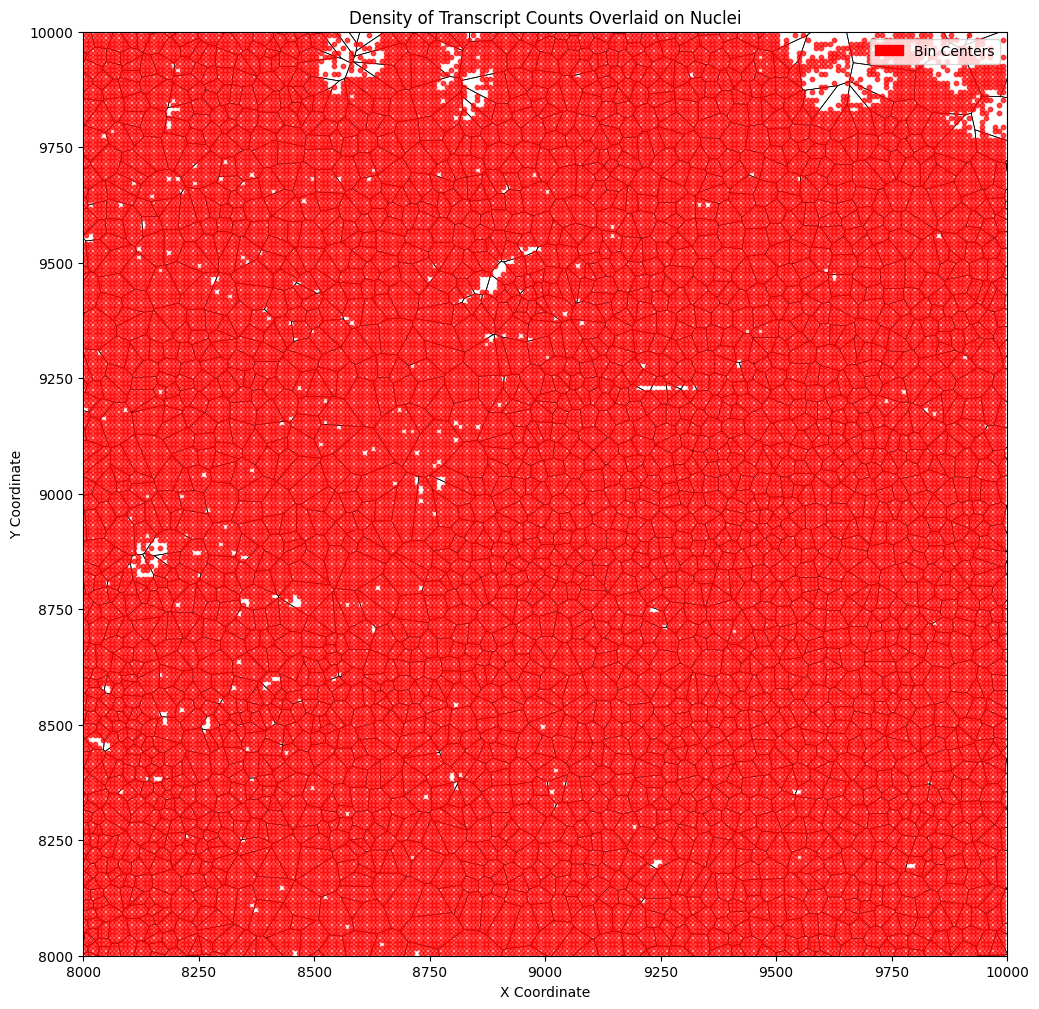

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from shapely.geometry import box
import geopandas as gpd

# Define bounding box
bbox = (8000, 8000, 10000, 10000)  # xmin, ymin, xmax, ymax

fig, ax = plt.subplots(figsize=(12, 12))

# Plot the GeoDataFrame polygons within the bounding box
gdf_clip = gdf[gdf.intersects(box(*bbox))]  # Filter GeoDataFrame
gdf_clip.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

points_gdf_clip = points_gdf[points_gdf.intersects(box(*bbox))]
points_gdf_clip.plot(ax=ax, color='red', markersize=10, alpha=0.7)

# Set plot limits based on bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

legend_elements = [Patch(color='red', label='Bin Centers')]
ax.legend(handles=legend_elements, loc='upper right')

plt.title('Transcript Overlaid on Cells')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()


In [30]:
stardist = gpd.read_file('../data/xenium/stardist_all.geojson')

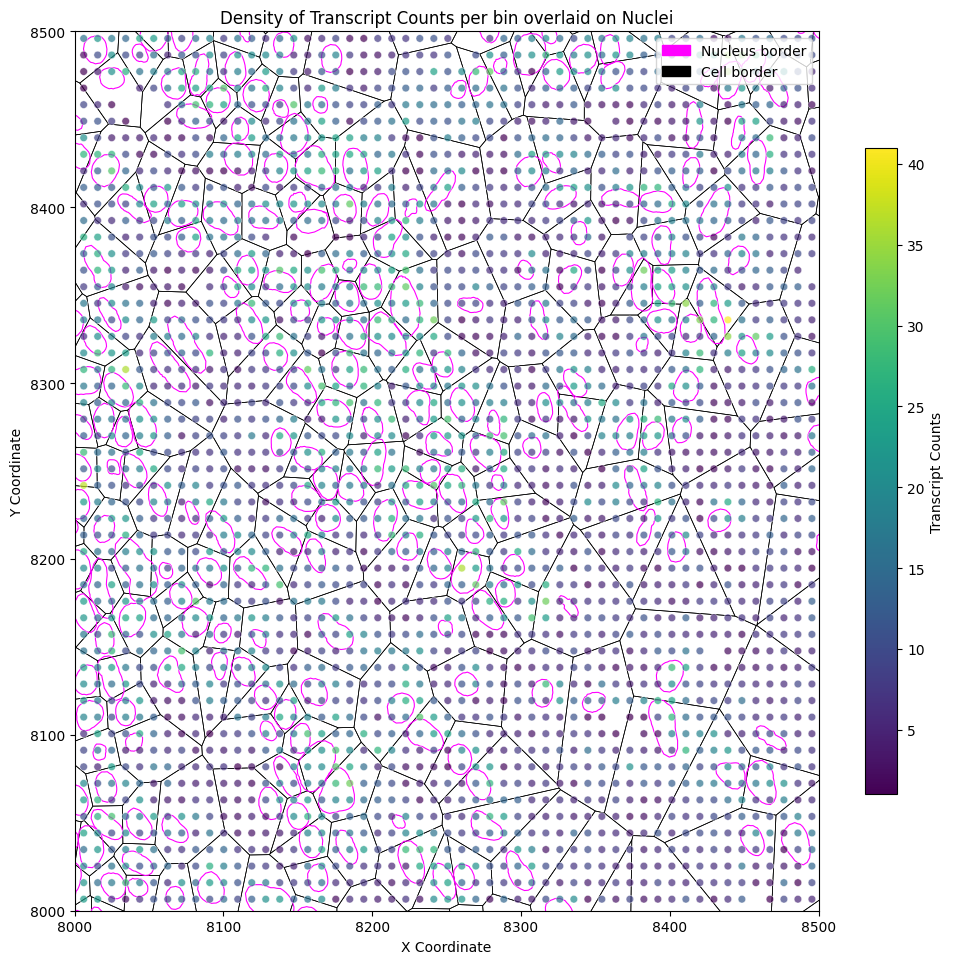

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
from shapely.geometry import box
import geopandas as gpd

# Define bounding box
bbox = (8000, 8000, 8500, 8500)  # xmin, ymin, xmax, ymax

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the GeoDataFrame polygons within the bounding box
gdf_clip = gdf[gdf.intersects(box(*bbox))]  # Filter GeoDataFrame
gdf_clip.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

stardist_clip = stardist[stardist.intersects(box(*bbox))]  # Filter GeoDataFrame
stardist_clip.plot(ax=ax, edgecolor='magenta', facecolor='none', linewidth=0.8)

# Extract and filter coordinates from the AnnData object
coords_df = pd.DataFrame(adata.obs[['center_x', 'center_y', 'n_genes_by_counts']])
coords_df = coords_df.dropna()  # Drop any rows with NaN values

# Filter coordinates based on the bounding box
coords_df_filtered = coords_df[
    (coords_df['center_x'] >= bbox[0]) &
    (coords_df['center_x'] <= bbox[2]) &
    (coords_df['center_y'] >= bbox[1]) &
    (coords_df['center_y'] <= bbox[3])
]

# Overlay the points on the KDE plot
sns.scatterplot(
    x=coords_df_filtered['center_x'],
    y=coords_df_filtered['center_y'],
    hue=coords_df_filtered['n_genes_by_counts'],
    palette='viridis',
    ax=ax,
    legend=None,
    marker='o',
    s=30,  # Adjust size as needed
    alpha=0.7
)

# Set plot limits based on bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=coords_df_filtered['n_genes_by_counts'].min(), vmax=coords_df_filtered['n_genes_by_counts'].max()))
cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label('Transcript Counts')

# Add legend
legend_elements = [Patch(color='magenta', label='Nucleus border'), Patch(color='black', label='Cell border')]
ax.legend(handles=legend_elements, loc='upper right')

# Set title and labels
plt.title('Density of Transcript Counts per bin overlaid on Nuclei')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()
